In [457]:
import numpy as np
import matplotlib.pyplot as plt 
import numpy as np
from numpy.linalg import inv

t0 = 0
x0 = 0
xdot0 = 0
xddot0 = 0
theta0 = 0
thetadot0 = 0
thetaddot0 = 0
tf = 30
n = 100001

In [458]:
m1   = 6; #[kg]
m2  = 3; #[kg]
lc  = 0.0983; #[m]
I1   = 0.26; #[m]
g   = 9.81; #[m/s^2]
c = 39;
c_t = 4;
stepamp = 0.5;
k = 40;
theta = 0;
thetadot = 0;
x = 0;
xdot = 0;

In [459]:
dt = (tf - x0) / (n - 1)
t = np.linspace(t0,tf, n)
x = np.zeros ([ n ])
xdot = np.zeros ([ n ])
xddot = np.zeros ([ n ])
theta = np.zeros ([ n ])
thetadot = np.zeros ([ n ])
thetaddot = np.zeros ([ n ])

f = np.zeros ([ n ])
tf = np.zeros ([ n ])

thetad = np.zeros ([ n ])
xd = np.zeros ([ n ])

e_x = np.zeros ([ n ])
e_t = np.zeros ([ n ])

ei_x = np.zeros ([ n ])
ei_t = np.zeros ([ n ])

ed_x = np.zeros ([ n ])
ed_t = np.zeros ([ n ])

In [460]:
x[0] = x0
xdot[0] = xdot0
xddot[0] = xddot0

theta[0] = theta0
thetadot[0] = thetadot0
thetaddot[0] = thetaddot0

thetad[0] = 0
xd[0] = 0

In [471]:
kp_x = 60;
ki_x = 51;
kd_x = 0.01;
 
kp_t =  12;
ki_t = 7;
kd_t = 0.05;

In [472]:

for i in range (1 , n) :
    M = [[(m1+m2), (m2*(lc)*np.cos(theta[i-1]))],
         [(m2*lc*np.cos(theta[i-1])), (m2*(lc**2) + I1)]]
    C = [[c*xdot[i-1] + k*x[i-1] - (m2*(thetadot[i-1]**2)*lc*np.sin(theta[i-1]))], [m2*g*lc*np.sin(theta[i-1])+ c_t*thetadot[i-1]]]

    G = -np.asmatrix(inv(M))*C;
    B = np.asmatrix(inv(M));

    # Desired reference
    
    if t[i]>0:
        thetad[i] = 0.1
        xd[i] = 0.1
    if t[i]>8:
        thetad[i] = 0.2
        xd[i] = 0
    if t[i]>16:
        thetad[i] = 0.1
        xd[i] = 0.1
    if t[i]>24:
        thetad[i] = 0.2
        xd[i] = 0
    xddot[i] = xd[i] - xd[i-1]
    thetaddot[i] = thetad[i] - thetad[i-1]    
    
    
    # Errors
    
    e_x[i] = xd[i-1] - x[i-1] 
    e_t[i] = thetad[i-1] - theta[i-1] 
    
    ed_x[i] =  xddot[i-1] - xdot[i-1] 
    ed_t[i] =  thetaddot[i-1] - thetadot[i-1] 
    
    ei_x[i] = ei_x[i-1] + dt * e_x[i]
    ei_t[i] = ei_t[i-1] + dt * e_t[i]
    
    # Controller
    
    f[i] = (kp_x*e_x[i]) + (ki_x*ei_x[i]) + (kd_x*ed_x[i])
    tf[i] = (kp_t*e_t[i]) + (ki_t*ei_t[i]) + (kd_t*ed_t[i])
    
    
    # Open-loop
#     if t[i]>2 and t[i]<4:
#         f[i] = 5
#         tf[i] = 5
#     else:
#         f[i] = 0
#         tf[i] = 0
        
    U = [[f[i]],
         [tf[i]]]
    twodot = G + B*U
    xddot[i] = twodot[0]
    thetaddot[i] = twodot[1]

    
    xdot[i] = xdot[i-1] +  (dt * xddot[i])
    x[i] =  x[i-1] + (dt * (xdot[i]))
    
    thetadot[i] = thetadot[i-1] +  (dt * thetaddot[i])
    theta[i] =  theta[i-1] + (dt * (thetadot[i]))

    

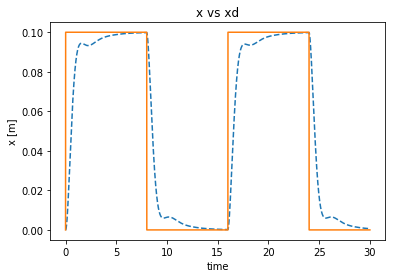

In [473]:
plt.plot(t,  x,'--')
# plt.plot(t,  f,'--')
plt.plot(t,  xd)
plt.xlabel('time')
plt.ylabel('x [m]')
plt.title('x vs xd')
plt.show ()

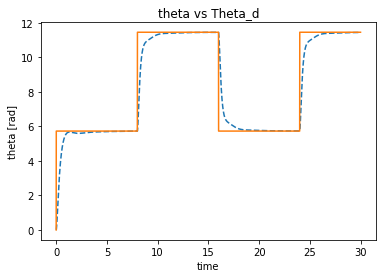

In [474]:
plt.plot(t,  theta*57.2958,'--')
plt.plot(t,  thetad*57.2958)
plt.xlabel('time')
plt.ylabel('theta [rad]')
plt.title('theta vs Theta_d')
plt.show ()

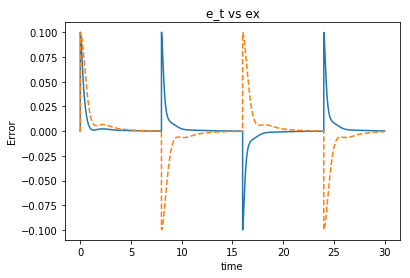

In [475]:
plt.plot(t,  e_t)
plt.plot(t,  e_x,'--')
plt.xlabel('time')
plt.ylabel('Error')
plt.title('e_t vs ex')
plt.show ()